# 텐서플로 추상화와 간소화, TFLearn

> TFLearn은 텐서플로의 추상화 라이브러리이다. 이번에는 **TFLearn** 에 대해 알아보도록 하자.


### TFLearn 설치

[TFLearn](http://tflearn.org/)은 텐서플로에 포함되어 있지 않기 때문에 별도의 설치가 필요하다. Terminal(또는 cmd창)에 pip 명령을 이용해 설치할 수 있다.

```
pip install tflearn
```

### CNN
TFLearn은 Chap07.1 - tf.estimator와 유사하지만, TFLearn을 사용하면 조금 더 깔끔하게 모델을 만들 수 있다. TFLearn.org에서는 TFLearn을 다음과 같이 소개하고 있다.

> Easy-to-use and understand high-level API for implementing deep neural networks, with tutorial and examples.

> Fast prototyping through highly modular built-in neural network layers, regularizers, optimizers, metrics...

> Full transparency over Tensorflow. All functions are built over tensors and can be used independently of TFLearn.

> Powerful helper functions to train any TensorFlow graph, with support of multiple inputs, outputs and optimizers.

> Easy and beautiful graph visualization, with details about weights, gradients, activations and more...

> Effortless device placement for using multiple CPU/GPU.

 

TFLearn에서의 모델 생성은 ```regression()```을 사용하여 래핑되고 마무리된다. ```regression()```함수에서 손실함수(loss) 및 최적화(optimizer)를 설정해준다.

그렇다면, TFLearn을 이용해 MNIST 데이터를 분류하는 CNN 모델을 만들어 보도록 하자.




In [1]:
import numpy as np
import tflearn
import tflearn.datasets.mnist as mnist
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression


C:\Users\saint\Anaconda3\envs\chat_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saint\Anaconda3\envs\chat_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saint\Anaconda3\envs\chat_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saint\Anaconda3\envs\chat_env\lib\site-packages\tensorf

curses is not supported on this machine (please install/reinstall curses for an optimal experience)








In [ ]:
# 데이터를 로딩하고 기본적인 변환을 수행
train_x, train_y, test_x, test_y = mnist.load_data(one_hot=True, 
                                                   data_dir='../data')
train_x = train_x.reshape([-1, 28, 28, 1])
test_x = test_x.reshape([-1, 28, 28, 1])


In [ ]:
print("Number of original training examples:", len(train_x))
print("Number of original test examples:", len(test_x))

In [ ]:
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

print(train_y[0])

plt.imshow(train_x[0, :, :, 0])
plt.colorbar()

In [ ]:
# Building the network
CNN = input_data(shape=[None, 28, 28, 1], name='input')
CNN = conv_2d(CNN, 32, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = conv_2d(CNN, 64, 5, activation='relu', regularizer='L2')
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = fully_connected(CNN, 1024, activation=None)
CNN = dropout(CNN, 0.5)
CNN = fully_connected(CNN, 10, activation='softmax')
CNN = regression(CNN, optimizer='adam', learning_rate=0.0001, 
                 loss='categorical_crossentropy', name='target')



In [ ]:
# Training the network
model = tflearn.DNN(CNN, tensorboard_verbose=0, 
                    tensorboard_dir='./MNIST_tflearn_board/', 
                    checkpoint_path='./MNIST_tflearn_checkpoints/checkpoint')
model.fit({'input': train_x}, {'target': train_y}, n_epoch=3,
          validation_set=({'input': test_x}, {'target': test_y}),
          snapshot_step=1000, show_metric=True, run_id='convnet_mnist')

위의 코드에서 `tflearn.DNN()`함수는 `tf.estimator.Estimator()`와 비슷한 기능을 하는데, `regression()`으로 래핑된 모델을 인스턴스화하고 만들어진 모델을 전달하는 역할을 한다. 또한 텐서보드(TensorBoard)와 체크포인트(checkpoint) 디렉터리 등을 설정할 수 있다. 모델 적합 연산은 `.fit()` 메서드를 이용해 수행된다. 

모델 적합(`.fit()`), 즉 학습이 완료되면, 다음과 같은 메소드를 이용해 모델을 평가, 예측, 저장 및 불러오기 등을 수행할 수 있다.

| 메서드	| 설명|
|:---|:---|
| `evaluate(X, Y, batch_size)` | 주어진 샘플에서 모델을 평가|
| `fit(X, Y, n_epoch)` | 입력 feature X와 타겟 Y를 모델에 적용하여 학습|
| `get_weights(weight_tensor)` | 변수의 가중치를 반환|
| `load(model_file)` | 학습된 모델 가중치를 불러오기|
| `predict(x)` | 주어진 x 데이터를 모델을 이용해 예측|
| `save(model_file)` | 학습된 모델 가중치를 저장|
| `set_weights(tensor, weights)` | 주어진 값을 텐서 변수에 할당|


In [ ]:
# Evaluate the network
evaluation = model.evaluate(X=test_x, Y=test_y, batch_size=128)
print(evaluation)

# Predict
pred = model.predict(test_x)
accuarcy = (np.argmax(pred, 1)==np.argmax(test_y, 1)).mean()
print(accuarcy)

### RNN

이번에는 TFLearn을 이용해 RNN을 구현해 보도록하자. 구현할 RNN 모델은 영화 리뷰에 대한 감성분석으로, 리뷰에 대해 좋거나/나쁘거나 두 개의 클래스를 분류하는 모델이다. 데이터는 학습 및 테스트 데이터가 각각 25,000개로 이루어진 [IMDb](https://www.imdb.com/interfaces/) 리뷰 데이터를 사용한다.


In [2]:
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb



In [3]:
# IMDb 데이터셋 로드
(train_x, train_y), (test_x, test_y), _ = imdb.load_data(path='../data/imdb.pkl', 
                                                         n_words=10000,
                                                         valid_portion=0.1)


In [4]:
print('훈련용 리뷰 개수 : {}'.format(len(train_x)))
print('테스트용 리뷰 개수 : {}'.format(len(test_x)))
num_classes = max(train_y) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 22500
테스트용 리뷰 개수 : 2500
카테고리 : 2


훈련 데이터가 어떻게 구성되어있는지를 확인하기 위해 첫번째 훈련용 리뷰를 출력해보았습니다. 다시 말해, 22,500개의 영화 리뷰 중 첫번째 리뷰 텍스트와 그 리뷰에 대한 레이블을 출력해보는 것입니다.

In [5]:
print(train_x[0])
print(train_y[0])

[17, 25, 10, 406, 26, 14, 56, 61, 62, 323, 4]
0


첫번째 훈련용 리뷰(X_train[0], y_train[0])에서 리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있습니다. 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태입니다. IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했습니다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높습니다. 위에서 단어 집합의 크기를 제한하지 않았기 때문에 406과 같은 큰 숫자도 보입니다.

첫번째 훈련용 리뷰의 레이블에 해당하는 y_train[0]의 값은 1입니다. 이 값은 첫번째 훈련 데이터가 2개의 카테고리 중 1에 해당하는 카테고리임을 의미합니다. 이 예제의 경우 감성 정보로서 0 또는 1의 값을 가지는데, 이 경우에는 부정을 의미하는 1의 값을 가집니다.

22,500개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

리뷰의 최대 길이 : 2820
리뷰의 평균 길이 : 284.0717333333333


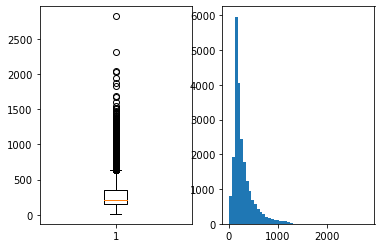

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

len_result = [len(s) for s in train_x]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [7]:
unique_elements, counts_elements = np.unique(train_y, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [11250 11250]]


22,500개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 11,265개로 균등한 분포를 가지고 있습니다. train_x에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠습니다. imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있습니다. 주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수입니다. 이것은 IMDB 리뷰 데이터셋에서 정한 규칙입니다.

위에서 불러온 IMDb 데이터는 각각 다른 시퀀스 길이를 가지고 있으므로 최대 시퀀스 길이를 100으로 하여 `tflearn.data_utils.pad_sequences()`를 사용해 제로 패딩으로 시퀀스의 길이를 맞춰준다.

In [8]:
# Sequence padding and Converting labels to binary vectors
train_x = pad_sequences(train_x, maxlen=100, value=0.)
test_x = pad_sequences(test_x, maxlen=100, value=0.)
train_y = to_categorical(train_y, nb_classes=2)
test_y = to_categorical(test_y, nb_classes=2)


그런다음, `tflearn.embedding()`으로 벡터 공간으로의 임베딩을 수행한다. 아래의 코드에서 확인할 수 있듯이 각 단어는 128 크기인 벡터에 매핑된다. 이렇게 임베딩된 결과를 `LSTM layer`와 `fully_connected layer`를 추가해 모델을 구성해준다.


In [9]:
# Building a LSTM network
# Embedding
RNN = tflearn.input_data([None, 100])
RNN = tflearn.embedding(RNN, input_dim=10000, output_dim=128)

# LSTM Cell
RNN = tflearn.lstm(RNN, 128, dropout=0.8)
RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = tflearn.regression(RNN, optimizer='adam', 
                         learning_rate=0.001, loss='categorical_crossentropy')




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
# Training the network
model = tflearn.DNN(RNN, tensorboard_verbose=0, 
                    tensorboard_dir='./IMDb-tflearn_board/')
model.fit(train_x, train_y, 
          validation_set=(test_x, test_y), 
          show_metric=True, batch_size=32)


Training Step: 7039  | total loss: 0.09781 | time: 86.258s
| Adam | epoch: 010 | loss: 0.09781 - acc: 0.9805 -- iter: 22496/22500
Training Step: 7040  | total loss: 0.09069 | time: 88.651s
| Adam | epoch: 010 | loss: 0.09069 - acc: 0.9824 | val_loss: 0.68110 - val_acc: 0.8060 -- iter: 22500/22500
--


In [11]:
# evaluate the network
evaluation = model.evaluate(test_x, test_y, batch_size=128)
print(evaluation)


[0.8060000007629394]
